Importing necccessary Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
from collections import Counter
import matplotlib.pyplot as plt

Reading Data and Specifications:
    Data: Kaggle Spam Filter 

#Storing and cleaning Data:
Spam = pd.read_csv('spam.csv', encoding="ISO-8859-1")
Spam = Spam[['v1', 'v2']]
Spam.rename(columns={'v1': 'spam', 'v2': 'text'}, inplace=True)

#Extracting Spam Data based on True/False:
Spam.spam = Spam.spam.apply(lambda s: True if s=='spam' else False)

#Converting to LowerCase:
Spam.text = Spam.text.apply(lambda t: t.lower().translate(str.maketrans('', '', string.punctuation)))

Spam = Spam.sample(frac=1)

Processed Dataset:

In [3]:
Spam

,spam,text
763,False,nothing but we jus tot u would ask cos u ba gu...
1279,False,waiting 4 my tv show 2 start lor u leh still b...
3165,True,hot live fantasies call now 08707509020 just 2...
2532,False,yup ok
3567,False,sent me de webadres for geting salary slip
...,...,...
4170,False,pls whats the full name of jokes school cos fe...
33,False,for fear of fainting with the of all that hous...
2577,False,hey whats up u sleeping all morning
4730,False,keng rocking in ashes


Text Data:

In [16]:
#get training set
train_df = Spam.iloc[:int(len(Spam)*0.7)]

#get testing set
test_df = Spam.iloc[int(len(Spam)*0.7):]

In [6]:
FRAC_SPAM_TEXTS = train_df.spam.mean()
print(FRAC_SPAM_TEXTS)

0.13435897435897437


In [17]:
train_spam_words = ' '.join(train_df[train_df.spam == True].text).split(' ')
train_non_spam_words = ' '.join(train_df[train_df.spam == False].text).split(' ')

common_words = set(train_spam_words).intersection(set(train_non_spam_words))

In [18]:
train_spam_bow = dict()
for w in common_words:
    train_spam_bow[w] = train_spam_words.count(w) / len(train_spam_words)

In [19]:
train_non_spam_bow = dict()
for w in common_words:
    train_non_spam_bow[w] = train_non_spam_words.count(w) / len(train_non_spam_words)

In [10]:
def predict_test(t, verbose=False):
    
    valid_words = [w for w in t if w in train_spam_bow]
    spam_probs = [train_spam_bow[w] for w in valid_words]
    non_spam_probs = [train_non_spam_bow[w] for w in valid_words]
    if verbose:
        data_df = pd.DataFrame()
        data_df['word'] = valid_words
        data_df['spam_prob'] = spam_probs
        data_df['non_spam_prob'] = non_spam_probs
        data_df['ratio'] = [s/n if n > 0 else np.inf for s,n in zip(spam_probs, non_spam_probs)]
        print(data_df)
    spam_score = sum([np.log(p) for p in spam_probs]) + np.log(FRAC_SPAM_TEXTS)
    
    non_spam_score = sum([np.log(p) for p in non_spam_probs]) + np.log(1-FRAC_SPAM_TEXTS)
    if verbose:
        print('Spam Score: %s'%spam_score)
        print('Non-Spam Score: %s'%non_spam_score)
    return (spam_score >= non_spam_score)

In [11]:
Spam.isnull().sum()

spam    0
text    0
dtype: int64

In [12]:
Spam.shape

(5572, 2)

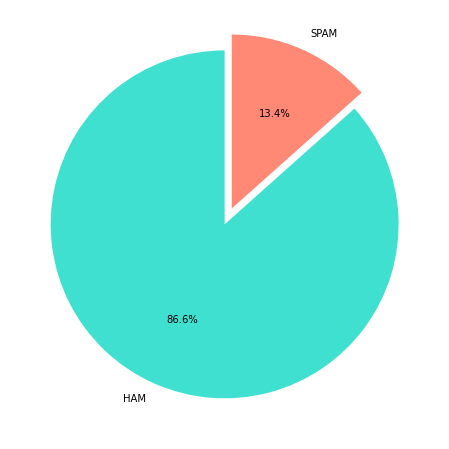

In [13]:
plt.figure(figsize=(10,8))
plt.pie(Spam['spam'].value_counts(), labels=['HAM','SPAM'], autopct='%1.1f%%', colors = ['turquoise','#ff8975'], startangle=90, explode = (0, 0.1))
plt.show()

In [14]:
Spam['spam'].value_counts()

False    4825
True      747
Name: spam, dtype: int64

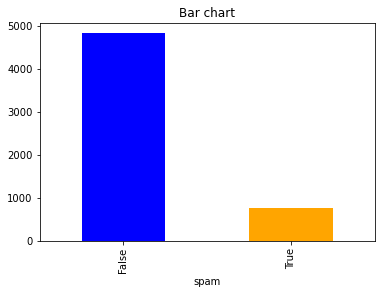

In [20]:
count_Class= Spam.value_counts(Spam["spam"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [21]:
predict_test('urgent call this number'.split(), verbose=True)

     word  spam_prob  non_spam_prob       ratio
0  urgent   0.003727       0.000021  181.653584
1    call   0.018950       0.003344    5.667042
2    this   0.004995       0.003508    1.423936
3  number   0.001586       0.000841    1.885351
Spam Score: -23.31137807686941
Non-Spam Score: -29.372730780641646


True

In [22]:
predict_test('Hello how are you?'.split(), verbose=True)

  word  spam_prob  non_spam_prob     ratio
0  how   0.000476       0.003590  0.132513
1  are   0.004520       0.005888  0.767607
Spam Score: -15.057237452063992
Non-Spam Score: -10.908732600845498


False

In [23]:
predict_test('The research paper discusse s the Perpetual benefits of Tangible User Interface(TUI) for collaborative learning using mobile eye trackers. The article investigated the way users memorize, analyze, collaborate, and learn new concepts on a Tangible User Interface (TUI). A tangible user interface (TUI) is a user interface in which a person interacts with digital information through the physical environment. Two groups of twenty-seven pairs of apprentices were made to interact with interactive warehouse simulation to investigate this. The first group of participants used the 3D models, and the second group used 2D paper shelves. This arrangement helped us understand the "representational effect" of 3D tangibles as the first group used actual miniature shelves to stack up as a warehouse representation. In contrast, the other group used paper cut into rectangular pieces to represent warehouse shelves.'.split(), verbose=True)

           word  spam_prob  non_spam_prob      ratio
0             s   0.000555       0.000328   1.690924
1           the   0.011180       0.016166   0.691575
2            of   0.006105       0.007385   0.826674
3           for   0.010466       0.007283   1.437116
4         using   0.000159       0.000062   2.576647
5        mobile   0.006819       0.000226  30.217037
6           eye   0.000079       0.000021   3.864970
7           the   0.011180       0.016166   0.691575
8           way   0.000079       0.001457   0.054436
9           and   0.007374       0.012535   0.588285
10          new   0.003885       0.000903   4.304171
11           on   0.008325       0.006072   1.371020
12            a   0.022598       0.015468   1.460897
13         user   0.000476       0.000021  23.189819
14           is   0.008643       0.010586   0.816437
15            a   0.022598       0.015468   1.460897
16         user   0.000476       0.000021  23.189819
17           in   0.003964       0.011858   0.

True

In [24]:
predictions = test_df.text.apply(lambda t: predict_test(t.split()))

In [25]:
frac_spam_messages_correctly_detected = np.sum((predictions == True) & (test_df.spam == True)) / np.sum(test_df.spam == True)
print('Fraction Spam Correctly Detected: %s'%frac_spam_messages_correctly_detected)

Fraction Spam Correctly Detected: 0.9147982062780269


In [26]:
frac_valid_sent_to_spam = np.sum((predictions == True) & (test_df.spam == False)) / np.sum(test_df.spam == False)
print('Fraction Valid Messages Sent to Spam: %s'%frac_valid_sent_to_spam)

Fraction Valid Messages Sent to Spam: 0.022774327122153208
